In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import os
import seaborn as sns

C:\Users\Programming\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Programming\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\Programming\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


### Data path 

In [2]:
curr_path = os.getcwd()
data_dir = os.path.join(curr_path, "get-data/dataset")
match_csv = os.path.join(data_dir, "match.csv")
pro_list_csv = os.path.join(data_dir, "pro_list_updated.csv")

### 1. Quick overview of the match dataset

We will plot some basic descriptive statistics regarding our dataset.

In [3]:
match_df = pd.read_csv(match_csv)

In [4]:
print("Dataset of shapes : ", match_df.shape)
match_df.head()

Dataset of shapes :  (95228, 117)


,gameCreation,gameDuration,gameEndTimestamp,gameId,gameMode,gameName,gameStartTimestamp,gameType,gameVersion,mapId,...,trueDamageTaken,turretKills,turretTakedowns,turretsLost,unrealKills,visionScore,visionWardsBoughtInGame,wardsKilled,wardsPlaced,win
0,1648812630000,970,1648813616016,5803019526,CLASSIC,teambuilder-match-5803019526,1648812645497,MATCHED_GAME,12.6.430.6775,11,...,65,0,0,0,0,30,9,5,17,True
1,1648810785000,976,1648811776409,5803085882,CLASSIC,teambuilder-match-5803085882,1648810799996,MATCHED_GAME,12.6.430.6775,11,...,2831,0,0,2,0,19,6,1,14,False
2,1648761974000,1442,1648763435969,5802380209,CLASSIC,teambuilder-match-5802380209,1648761993552,MATCHED_GAME,12.6.430.6775,11,...,1106,1,4,2,0,71,15,6,36,True
3,1648759752000,1352,1648761123399,5802324003,CLASSIC,teambuilder-match-5802324003,1648759771064,MATCHED_GAME,12.6.430.6775,11,...,827,0,2,3,0,51,13,5,28,True
4,1648758011000,1175,1648759218601,5802088187,CLASSIC,teambuilder-match-5802088187,1648758043381,MATCHED_GAME,12.6.430.6775,11,...,104,0,3,3,0,42,10,1,22,True


#### 1.1 Exploratory Analysis

In this part, we will explore the different feature's distribution. 
We will process in the following order : 
       
    1 - We will take a look at missing values
    2 - We will remove unnecessary features
    3 - We will plot some basic histogrames and distribution
    4 - We will proceed in a multivariate analysis of key features
    5 - We will study the correlation between our features

In [5]:
# 1 - Missing values 
for col in match_df.columns: 
    print(f"Column : {col} has {match_df[col].isna().sum()} missing values")

Column : gameCreation has 0 missing values
Column : gameDuration has 0 missing values
Column : gameEndTimestamp has 0 missing values
Column : gameId has 0 missing values
Column : gameMode has 0 missing values
Column : gameName has 0 missing values
Column : gameStartTimestamp has 0 missing values
Column : gameType has 0 missing values
Column : gameVersion has 0 missing values
Column : mapId has 0 missing values
Column : platformId has 0 missing values
Column : queueId has 0 missing values
Column : tournamentCode has 95228 missing values
Column : assists has 0 missing values
Column : baronKills has 0 missing values
Column : bountyLevel has 0 missing values
Column : champExperience has 0 missing values
Column : champLevel has 0 missing values
Column : championId has 0 missing values
Column : championName has 0 missing values
Column : championTransform has 0 missing values
Column : consumablesPurchased has 0 missing values
Column : damageDealtToBuildings has 0 missing values
Column : damag

In [6]:
match_df = match_df.drop_duplicates()

 - riotIdTagline, riotIdName, tournamentCode are useless and do not carry relevant informations
 - We will try to replace the teamPosition's nan values with values from other features

In [7]:
#### Focus on riotIdTagline, riotIdName, tournamentCode and teamPosition

unique_riot_tagline = match_df["riotIdTagline"].unique()
print("riotIdTagline unique values : ", unique_riot_tagline) 

unique_riot_name = match_df["riotIdName"].unique()
print("riotIdName unique values : ", unique_riot_name) 

unique_team_position = match_df["teamPosition"].unique()
print("teamPosition unique values : ", unique_team_position) 

unique_tournamenet = match_df["tournamentCode"].unique()
print("tournamentCode unique values :", unique_tournamenet)

riotIdTagline unique values :  [nan]
riotIdName unique values :  [nan]
teamPosition unique values :  ['UTILITY' 'BOTTOM' 'MIDDLE' 'TOP' 'JUNGLE' nan]
tournamentCode unique values : [nan]


We would like to add a role to any player. 
We have 4 features to play with : 

In [8]:
print("lane unique values :", match_df["lane"].unique())
print("role unique values :", match_df["role"].unique())
print("teamPosition unique values :", match_df["teamPosition"].unique())
print("individualPosition unique values :", match_df["individualPosition"].unique())

lane unique values : ['NONE' 'BOTTOM' 'JUNGLE' 'MIDDLE' 'TOP']
role unique values : ['SUPPORT' 'SOLO' 'CARRY' 'NONE' 'DUO']
teamPosition unique values : ['UTILITY' 'BOTTOM' 'MIDDLE' 'TOP' 'JUNGLE' nan]
individualPosition unique values : ['UTILITY' 'BOTTOM' 'MIDDLE' 'TOP' 'JUNGLE' 'Invalid']


According to the api : 
    <i>"Generally the recommendation is to use the teamPosition field over the individualPosition field."</i>

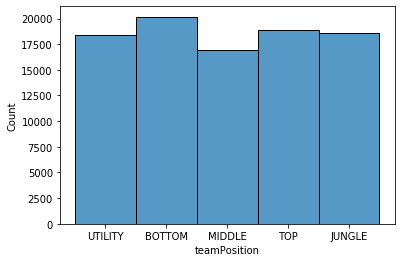

In [9]:
match_df = match_df.dropna(subset=['teamPosition'])
sns.histplot(match_df["teamPosition"])

In [10]:
# match_df[match_df["teamPosition"] == "BOTTOM"]["role"].value_counts()
# match_df = match_df.dropna(subset=['teamPosition'])
# match_df["teamPosition"] = np.where(match_df["teamPosition"] == "UTILITY", match_df["role"], match_df["teamPosition"])

# print("Unique values after replacement : ", match_df["teamPosition"].value_counts())

In [11]:
# 2 - Remove irrelevant features : we now have a total of 109 features
to_remove = [
    "gameId", "gameMode", "gameName", "gameType",
    "mapId", "puuid", 
    "riotIdTagline", "riotIdName", 
    "championId", "champExperience", "role", "individualPosition", "lane", 
    "summonerId", "summonerName", "championName","queueId", "participantId", 
    "profileIcon"
]
# match_df.drop(["role", "individualPosition", "lane"], axis=1, inplace=True)
# match_df.drop("summonerId", axis=1, inplace=True)
# match_df.drop("summonerName", axis=1, inplace=True)
# match_df.drop("championName", axis=1, inplace=True)
# match_df.drop(["queueId", "participantId", "profileIcon"], axis=1, inplace=True)


match_df = match_df.drop(to_remove, axis=1)
print("Dataset shapes after removal : ", match_df.shape)

Dataset shapes after removal :  (93099, 98)


#### converting from seconds to min

In [12]:
match_df["gameDuration"] = match_df["gameDuration"] / 60 

In [13]:
match_df.groupby("win")["gameDuration"].describe()

,count,mean,std,min,25%,50%,75%,max
win,,,,,,,,
False,44027.0,25.764809,6.343523,3.166667,21.550000,25.633333,29.916667,55.15
True,49072.0,25.246280,6.306076,3.166667,20.966667,25.100000,29.400000,55.10


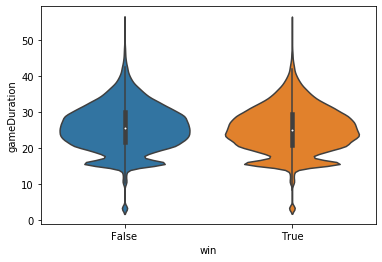

In [14]:
sns.violinplot(y=match_df["gameDuration"], x=match_df["win"])

#### Study of the distribution of the "Win" variable 


In [15]:
print("unique values for the win feature ", match_df["win"].unique())

unique values for the win feature  [ True False]


In [16]:
# let's convert everything to the same type 
# depending on the game version, we might have True or Win in a case of victory
# we convert everything to 1/0
match_df["win"] = match_df["win"].astype("bool")
match_df["win"] = match_df["win"].astype("int")

Win rate over the dataset : 52.71 % 
Loose rate over the dataset : 47.29 %


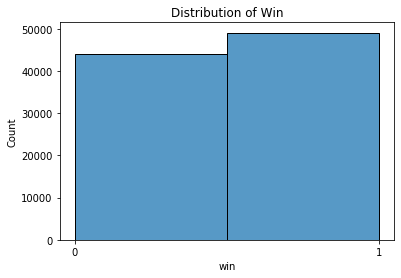

In [17]:
sns.histplot(match_df["win"], bins=2)
plt.xticks([0, 1])
plt.title("Distribution of Win")
win_frq, loose_frq = match_df["win"].value_counts(True)
print(f"Win rate over the dataset : {win_frq * 100:.2f} % ")
print(f"Loose rate over the dataset : {loose_frq * 100:.2f} %")
plt.show()

#### Study of kills/deaths/assists

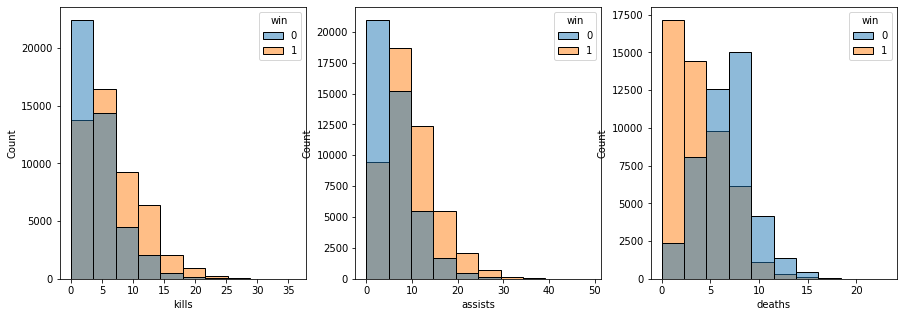

In [18]:
f, ax = plt.subplots(1, 3, figsize=(15,5))
sns.histplot(match_df, x="kills", bins=10, ax=ax[0], hue="win")
sns.histplot(match_df,x="assists", bins=10, ax=ax[1], hue="win")
sns.histplot(match_df,x="deaths", bins=10, ax=ax[2], hue="win")

win regarding kill streaks

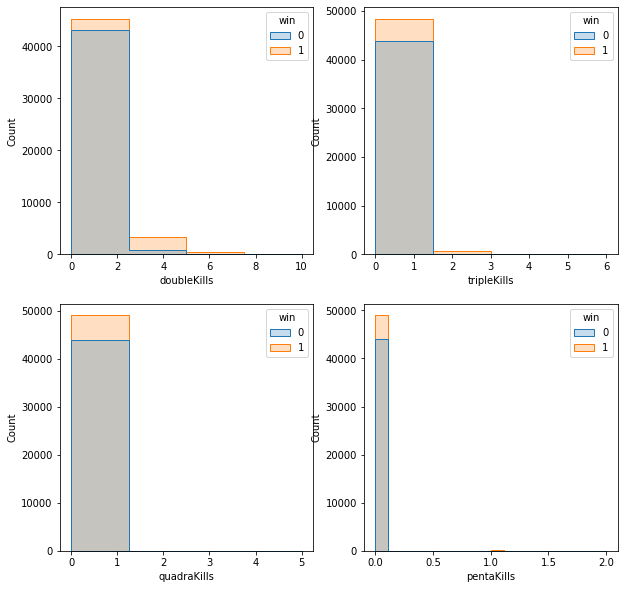

In [19]:
f, ax = plt.subplots(2,2, figsize=(10,10))
sns.histplot(match_df, x="doubleKills", bins=4, ax=ax[0, 0], hue="win", element="step")
sns.histplot(match_df, x="tripleKills", bins=4, ax=ax[0,1], hue="win", element="step")
sns.histplot(match_df, x="quadraKills", bins=4, ax=ax[1,0], hue="win", element="step")
sns.histplot(match_df, x="pentaKills",ax=ax[1,1], hue="win", element="step")
plt.show()

### There is a clear correlation between the streaks and the victory

Text(0.5, 1.0, 'doubleKills per game state')

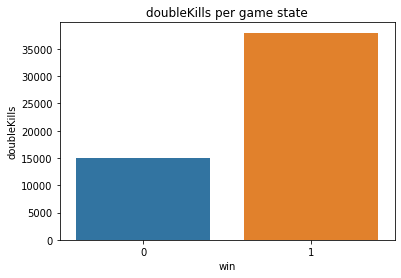

In [20]:
streak_data = match_df.groupby("win")[["doubleKills", "tripleKills", "quadraKills", "pentaKills"]].sum().reset_index()
sns.barplot(data=streak_data, y="doubleKills", x="win")
plt.title("doubleKills per game state")

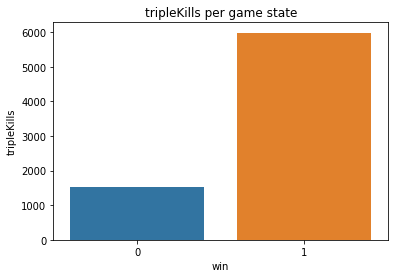

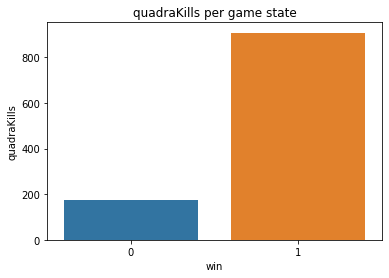

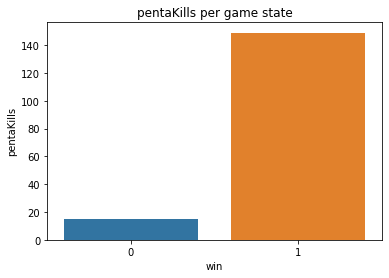

In [21]:
sns.barplot(data=streak_data, y="tripleKills", x="win")
plt.title("tripleKills per game state")
plt.show()

sns.barplot(data=streak_data, y="quadraKills", x="win")
plt.title("quadraKills per game state")
plt.show()

sns.barplot(data=streak_data, y="pentaKills", x="win")
plt.title("pentaKills per game state")
plt.show()

#### game duration distribution

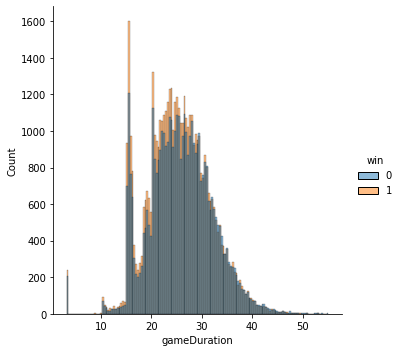

In [22]:
sns.displot(match_df, x="gameDuration", hue="win")

#### Study of championName

In [23]:
plt.figure(figsize=(50,10))
champ_dist = match_df["championName"].value_counts().reset_index()
champ_dist = champ_dist.sort_values("index")
plt.xticks(rotation=90)
sns.barplot(x=champ_dist["index"], y=champ_dist["championName"])

KeyError: 'championName'

<Figure size 3600x720 with 0 Axes>

#### win rate per champion

In [ ]:
match_df[match_df["championName"] == "Maokai"]["win"].value_counts()
match_df[match_df["championName"] == "Janna"][["turretKills", "turretTakedowns"]]

In [ ]:
plt.figure(figsize=(50,10))
winrate_champ = match_df.groupby("championName")["win"].mean().reset_index()
winrate_champ = winrate_champ.sort_values("win")
plt.xticks(rotation=90)
sns.barplot(data=winrate_champ, x="championName", y="win")

### Observations regarding the variable "kills", "deaths", "assists" : 

#### Clear and obvious correlation : 

We observe that the more kills and assits, and the least deaths you have during a game, for any particular teamPosition, the more likely you are to win the game. Even if it sounds obvious, the following distribution reinforce our hypothesis

In [ ]:
sns.displot(match_df, x="kills",  ax=ax[0], hue="win", col="teamPosition")

In [ ]:
sns.displot(match_df, x="deaths",  ax=ax[0], hue="win", col="teamPosition")

In [ ]:
sns.displot(match_df, x="assists",  ax=ax[0], hue="win", col="teamPosition")

### Observations regarding the variable "GoldEearned" : 

#### Clear and obvious correlation (again) : 

We observe that the more gold you earn during the game, the more likely you are to win the game (obviously). Note that the fluctuation below 2500 are probably due to a match ended in surrender

In [ ]:
sns.displot(match_df, x="goldEarned",  ax=ax[0], hue="win", col="teamPosition")

### Analysis of objectives : 

#### We would like to answer the following questions : 

- <strong>Do players who use more visions tend to avoid being killed ?</strong> 
    <br><i>-> hypothesis : Having vision allows you to avoid being traped by your enemies</i>
<br>


- <strong>Does the steal of objectives strongly correlates with the victory ?</strong> 
    <br><i>-> hypothesis : As the steal of objectives play a key role in the mental of the ennemy team, and as it provides golds and additional enhancement, we believe that the correlation is strong and positive</i>
    <br><strong>Result : </strong> The steal of objectives is a rare phenomenon. But when it happens, it is more likely for the player to win the game. We see that on the 14 games where players stole 2 objectives, they constantly end up in winnin the game 
<br>

- <strong>What is the impact of vision in objective stealing ?</strong> 
    <br><i>-> hypothesis : We believe that vision wards (item that allow the user to have vision on the map in a particular zone) have an impact in the ability of a team to steal objectives</i>
    <br><strong>Result : </strong>We cannot say anything regarding the relation between the steal of objectives and the visionScore. Future work involving the global team stats such as number of objectives per team will probably consider visionScore as a crucial element
<br>


- <strong>Do players contributing to the very first kill are more likely to win the game ?</strong> 
    <br><i>-> hypothesis : We believe that taking the first kill of the game brings you confidence and put your team in a good state of mind</i>
    <br><strong>Result : </strong>Taking the first kill indeed increases the probability of a player to win the match. It is still true for helping a mate taking the first kill of the match
<br>

        

Distribution of the vision score and its impact on the victory: 

Observations : The Utility teamPosition can be seen as a support. The support has items allowing him to use special vision items, more times than other roles. The distributions of the visionScore for a support, conditioned by the victory, are very similar. 

In [ ]:
sns.displot(match_df, x="visionScore",  ax=ax[0], hue="win", col="teamPosition")

<strong>Kolmogorov-Smirnov godness of fitting between visionScore_win and visionScore_loss </strong>. 
The null hypothesis is that the two distributions are identical, F(x)=G(x) for all x; the alternative is that they are not identical.
If the KS statistic is small or the p-value is high, then we cannot reject the null hypothesis in favor of the alternative.



#### The p-value is lower than 0.05, thus it is very likely that both variables have a different distribution :

The win/loss impacts the distirbution of the visionScore. We cannot neglect the impact of the vision score of the Support.

In [ ]:
from scipy.stats import ks_2samp, zscore

visionScore_win = match_df[match_df["win"] == 1]["visionScore"].values
visionScore_loss = match_df[match_df["win"] == 0]["visionScore"].values

d, p_value = ks_2samp(visionScore_win, visionScore_loss)
print("distance : ",d)
print("p value : ", p_value)

#### vision and objectivesStolen

In [ ]:
sns.boxplot(data=match_df, y="visionScore", x="objectivesStolen", hue="win")

#### vision and objectivesStolenAssists

In [ ]:
sns.boxplot(data=match_df, y="visionScore", x="objectivesStolenAssists", hue="win")

#### It is a rare phenomenon for players to steal objectives

In [ ]:
print("ObjectiveStolen value counts : ", match_df["objectivesStolen"].value_counts())

In [ ]:
print("ObjectiveStolen value counts : ", match_df["objectivesStolenAssists"].value_counts())

In [ ]:
print("Win rate per Objective Stolen")
print(match_df.groupby("objectivesStolen")["win"].mean())

print("Objective Stolen Assist")
print(match_df.groupby("objectivesStolenAssists")["win"].mean())

### Does the first blood impacts the victory ? 

<strong>hypothesis : </strong> It might. Indeed, players who killed the first person in the game might gain confidence. On the other hand, the team victim of the first blood, might start on a fragile basis 

In [ ]:
match_df["firstBloodKill"] = match_df["firstBloodKill"].astype(int)

In [ ]:
sns.countplot(data=match_df, x="firstBloodKill", hue="win")

#### When the player is responsible of the firstBlood, he is more likely to win the game 

In [ ]:
fb_winrate = match_df[match_df["firstBloodKill"] == 1].groupby("win")["firstBloodKill"].sum().reset_index()

sns.barplot(data=fb_winrate, y="firstBloodKill", x="win")
plt.title("First blood rate per victory status")
plt.show()

#### When the player has contributed in the first blood , he is more likely to win the game 

In [ ]:
fb_winrate = match_df[match_df["firstBloodAssist"] == 1].groupby("win")["firstBloodAssist"].sum().reset_index()
sns.barplot(data=fb_winrate, y="firstBloodAssist", x="win")
plt.title("First blood rate per victory status")
plt.show()

### Analysis of game versions and dates

Exploratory analysis of the evaluation of the win rates over months during the season 12. We would like to see if we obtain different distributions from one path to another 

In [ ]:
print("All different game versions", match_df["gameVersion"].unique())

In [ ]:
versions = match_df["gameVersion"].value_counts()
print(versions)

In [ ]:
wr_version = match_df.groupby("gameVersion")[["win"]].mean().reset_index()
wr_version
sns.barplot(data=wr_version, y="win", x="gameVersion")
plt.title("First blood rate per victory status")
plt.xticks(rotation=90)
plt.yscale("log")
plt.show()

#### date formatting

In [ ]:
def to_date(timestamp): 
    res = datetime.fromtimestamp(timestamp / 1000).strftime('%Y-%m-%d')
    return res

In [ ]:
from datetime import datetime
match_df["gameCreation"] = match_df["gameCreation"].apply(lambda x: to_date(x))

In [ ]:
match_df = match_df.sort_values(by="gameCreation")

### Evolution of turretTakedowns over time

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.title("turretTakedowns over time")
sns.lineplot(data=match_df, x="gameCreation", y="turretTakedowns", hue="gameVersion")

### Evolution of penta kills over time

In [ ]:
penta_time = match_df.groupby("gameCreation")["pentaKills"].sum().reset_index()

plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.title("Penta Kills over time")
sns.lineplot(data=penta_time, x="gameCreation", y="pentaKills")

### Evolution of kills over time 

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.title("Kills over time")
sns.lineplot(data=match_df, x="gameCreation", y="kills", hue="gameVersion")
plt.show()

### Bounty level per game version

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.title("Kills over time")
sns.barplot(data=match_df, x="gameVersion", y="bountyLevel", hue="win")

## One hot encoding

-> of plateformID <br>
-> gameVersion <br>
-> of items (we have around 200 items)


In [ ]:
match_df = match_df.join(pd.get_dummies(match_df["platformId"]))

In [ ]:
match_df.drop("platformId", axis=1,inplace=True)

In [ ]:
pd.get_dummies(match_df[f"item2"])

In [ ]:
item_cols = []

for i in range(6): 
    item_cols.extend(
        match_df[f"item{i+1}"].to_list()
    )
    
item_cols = set(item_cols)

In [ ]:
items = pd.DataFrame(columns=item_cols)

for i in range(7): 
    items = items.add(pd.get_dummies(match_df[f"item{i}"].astype(int)), fill_value=0)


In [ ]:
match_df = match_df.join(items)

In [ ]:
for i in range(7):
    match_df.drop(f"item{i}", axis=1, inplace=True)

In [ ]:
# game version 

match_df = match_df.join(pd.get_dummies(match_df["gameVersion"]))

In [ ]:
match_df.drop("gameVersion", axis=1, inplace=True)

### Let's recap our new changes 

In [ ]:
# 1 - Missing values 
for col in match_df.columns: 
    print(f"Column : {col} has {match_df[col].isna().sum()} missing values")

### Let's drop more variables

In [ ]:
match_df = match_df.drop("tournamentCode", axis=1)

## Feature Selction : Experiment 1 

Our aim is to select the most relevant features to maximize the performance of our models 
Feature selection process : 

-> Amount of Variation <br>
-> Correlation <br>
-> Correlation with target <br>
-> PCA <br>
-> Cluster analysis <br>

### Analysis of variation

In [ ]:
# plt.figure(figsize=(100,100))
match_variance = match_df.var().reset_index()
match_std = match_df.std().reset_index()

In [ ]:
match_variance.rename(columns={0: "variance"}, inplace=True)
match_std.rename(columns={0: "std"}, inplace=True)

In [ ]:
match_variance

### show top 100 features with the lowest amount of variation 

In [ ]:
match_variance = match_variance.sort_values("variance", ascending=True)
match_variance
plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
plt.title("top 20 feature with the lowest variance")
sns.barplot(y="variance",x="index", data=match_variance[:100])

In [ ]:
match_std = match_std.sort_values("std", ascending=True)
match_variance
plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
plt.title("top 20 feature with the lowest std")
sns.barplot(y="std",x="index", data=match_std[:100])

#### For Machine Learning purposes, we will drop features that are not one hot encoded and have a low amount of variation

In [ ]:
to_remove = ["sightWardsBoughtInGame", "teamEarlySurrendered", "pentaKills", "gameEndedInEarlySurrender", "objectivesStolenAssists", "championTransform"]
match_df = match_df.drop(to_remove, axis=1) 

In [ ]:
# plt.figure(figsize=(100,100))
match_variance = match_df.var().reset_index()
match_std = match_df.std().reset_index()
match_variance.rename(columns={0: "variance"}, inplace=True)
match_std.rename(columns={0: "std"}, inplace=True)

### Let's see the new TOP 100

In [ ]:
match_variance = match_variance.sort_values("variance", ascending=True)
match_variance
plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
plt.title("top 20 feature with the lowest variance")
sns.barplot(y="variance",x="index", data=match_variance[:100])

In [ ]:
match_std = match_std.sort_values("std", ascending=True)
match_variance
plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
plt.title("top 20 feature with the lowest std")
sns.barplot(y="std",x="index", data=match_std[:100])

#### We might remove items with low variation later 

In [ ]:
to_remove = []

### Analysis of pairwise correlation

- df.corr() uses the pearson's coefficient which assumes that the variables are normally distributed


In [ ]:
corr = match_df[[x for x in match_df.columns if x not in items.columns]].corr()

gameEndTimeStamp and gameStartTimeStamp are highly correlated (pos)

In [ ]:
print("correlation vector damageDealtToBuildings")
to_remove.append("damageDealtToTurrets")
corr["damageDealtToBuildings"].sort_values()

gameEndTimeStamp and gameStartTimeStamp are highly correlated (pos)

In [ ]:
print("correlation vector goldEarned")
to_remove.append("goldSpent")
corr["goldEarned"].sort_values()

gameEndTimeStamp and gameStartTimeStamp are highly correlated (pos)

In [ ]:
print("correlation vector consumablesPurchased")
to_remove.append("detectorWardsPlaced")
corr["consumablesPurchased"].sort_values()

In [ ]:
to_remove.append("gameEndTimestamp")
to_remove.append("gameStartTimestamp")

In [ ]:
to_remove

In [ ]:
match_df.drop(to_remove, axis=1, inplace=True)

In [ ]:
corr = match_df[[x for x in match_df.columns if x not in items.columns]].corr()

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(corr)

### Study of correlation with the target 

In [ ]:
target_corr = corr["win"].sort_values()
target_corr

In [ ]:
### we will drop nexusLost  
match_df.drop("nexusLost", axis=1, inplace=True)

## Feature Standardization

In [ ]:
match_df.drop(["role", "individualPosition", "lane"], axis=1, inplace=True)
match_df.drop("summonerId", axis=1, inplace=True)
match_df.drop("summonerName", axis=1, inplace=True)
match_df.drop("championName", axis=1, inplace=True)
match_df.drop(["queueId", "participantId", "profileIcon"], axis=1, inplace=True)

In [ ]:
# reconverting dates : 
match_df["gameCreation"] = match_df["gameCreation"].apply(lambda x : datetime.strptime(x, "%Y-%m-%d").timestamp()) 

In [ ]:
match_df.columns.tolist()

In [ ]:
match_df.describe()

In [ ]:
# let's do some more one hot encoding

match_df = match_df.join(pd.get_dummies(match_df["championName"]))

In [ ]:
match_df = match_df.join(pd.get_dummies(match_df["teamPosition"]))

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(match_df)
match_df = scaler.transform(match_df)

In [ ]:
match_df["gameVersion"]